# Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from IPython.core.pylabtools import figsize
figsize(30, 10)

### Training Results

In [3]:
training_df = pd.read_csv('Results/spectra2eos/Training/00001.csv')
training_df.rename(columns = {'Unnamed: 0':'Epochs'}, inplace = True)

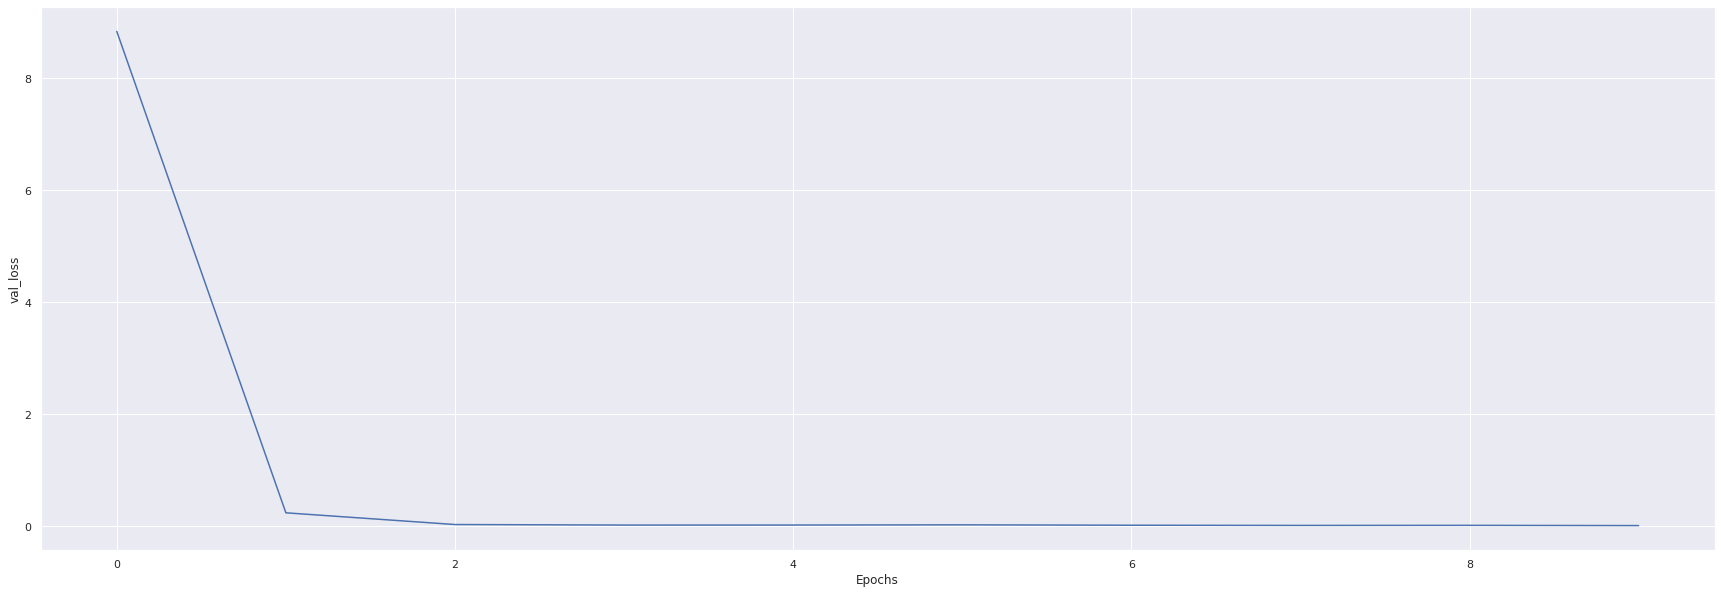

In [4]:
sns.lineplot(x='Epochs', y='val_loss', data=training_df);

### Prediction Analysis

In [5]:
df = pd.read_csv('Results/spectra2eos/Predictions/00001.csv')
squared_errors = (df[['c1', 'c2']].values - df[['pred_c1', 'pred_c2']].values)**2
df_errors = pd.DataFrame(columns=['c1', 'c2'], data=squared_errors)

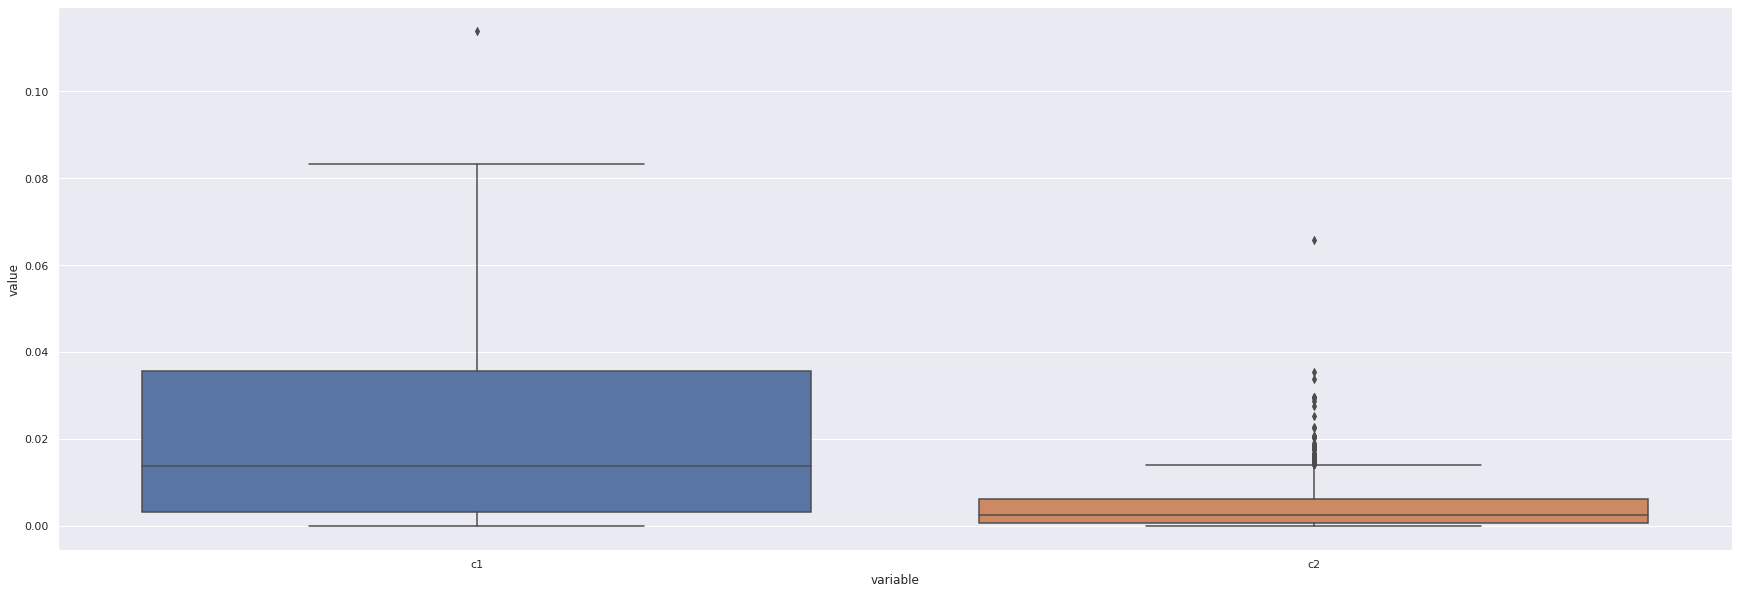

In [6]:
sns.boxplot(x='variable', y='value', data=pd.melt(df_errors));